In [1]:
#2º Etapa: Análise desctiviva

In [ ]:
#O objetivo desta etapa e responder as perguntas com a análise descritiva e começar a traçar o nosso perfil de cliente

In [2]:
#Importando pacotes
import pandas as pd
import numpy as np
import plotly.express as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("dataset_tratado.csv", sep =",")

In [4]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,Meat,Fish,Sweet,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2
0,5524,68,BB-Others,Graduation,Single,0,58138.0,Medium,635,88,546,172,88,88,1617,8,10,4,0,0
1,2174,71,BB-Others,Graduation,Single,2,46344.0,Low,11,1,6,2,1,6,27,1,1,2,0,0


In [5]:
#1.Média da renda dos clientes por grupos de idade e status civil?

In [6]:
#Podemos observar no gráfico que a geração Millennials, que moram juntos e solteiros são os que parecem ter em média maiores rendas, logo, estão os viúvos da geração Baby Boomer e gerações passadas (BB-Others),  que parecem ter em média maiores rendas, seguido dos casados. 
#Por último, observando a geração Xtemprana (Ger.X), os divorciados parecem receber em média mais que os solteiros e os casados. 
#Também podemos observar uma mudança de comportamento que começou na geração XTardia (Ger.X-BB) e seguiu para a geração dos Millennials, onde mais pessoas estão morando junto do que casando oficialmente. 

In [7]:
media_renda = dataset.groupby(['AgeClass', 'MaritalStatus'])['Income'].mean().reset_index()

In [8]:
media_renda

,AgeClass,MaritalStatus,Income
0,BB-Others,Divorced,54870.083944
1,BB-Others,Married,56769.966437
2,BB-Others,Single,54941.903303
3,BB-Others,Together,54262.308644
4,BB-Others,Widow,57982.886364
5,Ger.X,Divorced,50276.250000
6,Ger.X,Married,44510.853056
7,Ger.X,Single,44675.321682
8,Ger.X,Together,45480.188861
9,Ger.X-BB,Divorced,48922.167792


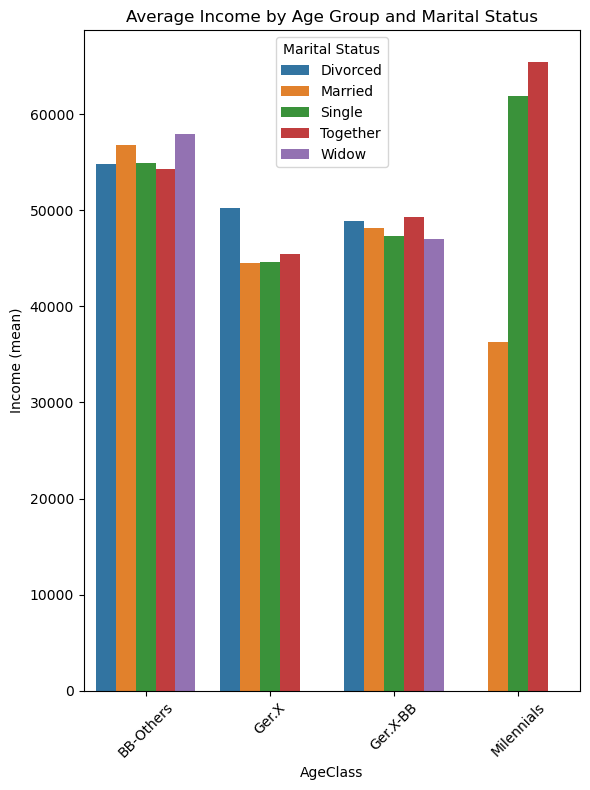

In [9]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_renda, x='AgeClass', y='Income', hue='MaritalStatus')
plt.title("Average Income by Age Group and Marital Status")
plt.ylabel('Income (mean)')
plt.xlabel('AgeClass')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#2.Média de gastos dos clientes por grupos de idade ?

In [11]:
#vemos que os solteiros e os que moram juntos da geração Millennials gastam em média muito mais que outras gerações, ao contrário, os casados que gastam muito menos que as outras gerações. 
#Em segundo lugar, o maior gasto médio está na geração Baby Boomer Tardia e outras gerações (BB-Others), onde os viúvos são os que mais gastam. Entretanto, os gastos são inferiores a geração millennials. 
#As gerações: Xtemprana (Ger.X), Xtardia e Baby Boomers Tempranos(Ger.x -BB) aparentam gastos média similares, exceto para os divorciados da geração da geração XTemprana (Ger.X), que mostram ter em média mais gastos.

In [12]:
media_gasto = dataset.groupby(['AgeClass', 'MaritalStatus'])['TotalExpense'].mean().reset_index()

In [13]:
media_gasto

,AgeClass,MaritalStatus,TotalExpense
0,BB-Others,Divorced,669.661972
1,BB-Others,Married,686.380835
2,BB-Others,Single,678.536697
3,BB-Others,Together,643.365931
4,BB-Others,Widow,790.909091
5,Ger.X,Divorced,624.000000
6,Ger.X,Married,542.611111
7,Ger.X,Single,504.205607
8,Ger.X,Together,547.126582
9,Ger.X-BB,Divorced,506.766234


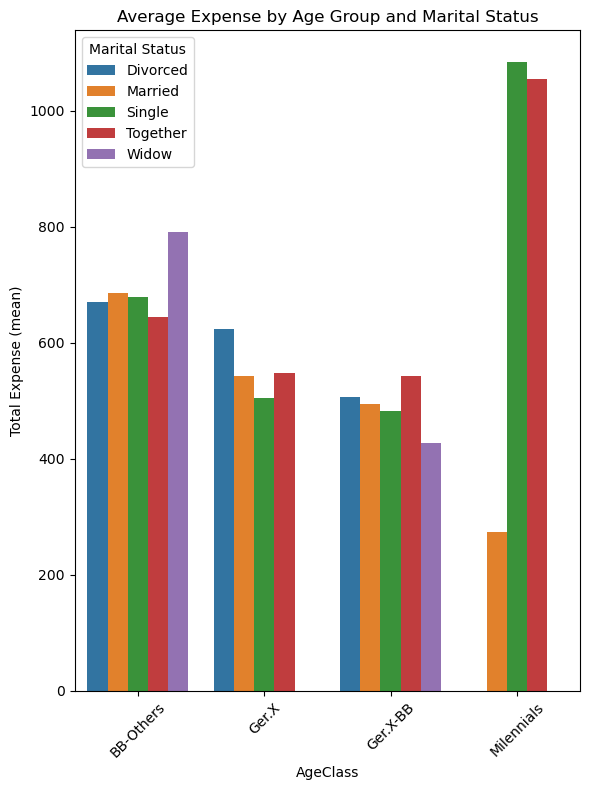

In [14]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_gasto, x='AgeClass', y='TotalExpense', hue='MaritalStatus')
plt.title("Average Expense by Age Group and Marital Status")
plt.ylabel('Total Expense (mean)')
plt.xlabel('AgeClass')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
#3.Quais são os produtos que vendem mais ?

In [16]:
#Os produtos que os clientes mais compram são os vinhos (680.038), seguido de carne (373.393) e ouro (98.358). Peixe (83.939), Doces(60.553), Frutas(58.767), são os menos vendidos. 

In [17]:
total_por_produto = dataset[["Wines", "Fruits","Meat","Fish","Sweet","Gold"]].sum().sort_values(ascending=False)

In [18]:
total_por_produto 

Wines     680038
Meat      373393
Gold       98358
Fish       83939
Sweet      60553
Fruits     58767
dtype: int64

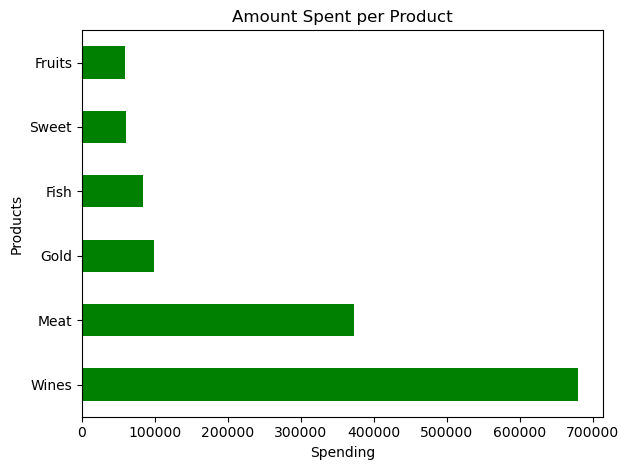

In [19]:
total_por_produto.plot(kind='barh', color='Green')
plt.title("Amount Spent per Product")
plt.xlabel("Spending")
plt.ylabel("Products")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
#4.Quem compra mais vinho ? 

In [21]:
#O primeiro gráfico aponta que a geração millennials, onde os clientes estão solteiros ou moram juntos são os que mais consomem vinho, em seguida estão as gerações Baby Boomers e passadas (BB-Others), que independente do seu estado civil, consomem vinhos.
#Quando aplicamos a categoria nível educação, podemos observar que quanto maior o nível educacional maior o consumo de vinhos, por exemplo, os que possuem o PhD consomem muito mais do que os que estudaram até o ensino médio. Os que possuem educação nível básico, aparentemente quase nunca ou nunca consomem vinho.

In [22]:
media_gasto_vinho= dataset.groupby(['MaritalStatus', "AgeClass"])['Wines'].mean().reset_index()

In [23]:
media_gasto_vinho

,MaritalStatus,AgeClass,Wines
0,Divorced,BB-Others,364.845070
1,Divorced,Ger.X,267.833333
2,Divorced,Ger.X-BB,263.987013
3,Married,BB-Others,358.000000
4,Married,Ger.X,251.388889
5,Married,Ger.X-BB,250.196721
6,Married,Milennials,66.875000
7,Single,BB-Others,350.816514
8,Single,Ger.X,213.065421
9,Single,Ger.X-BB,217.059259


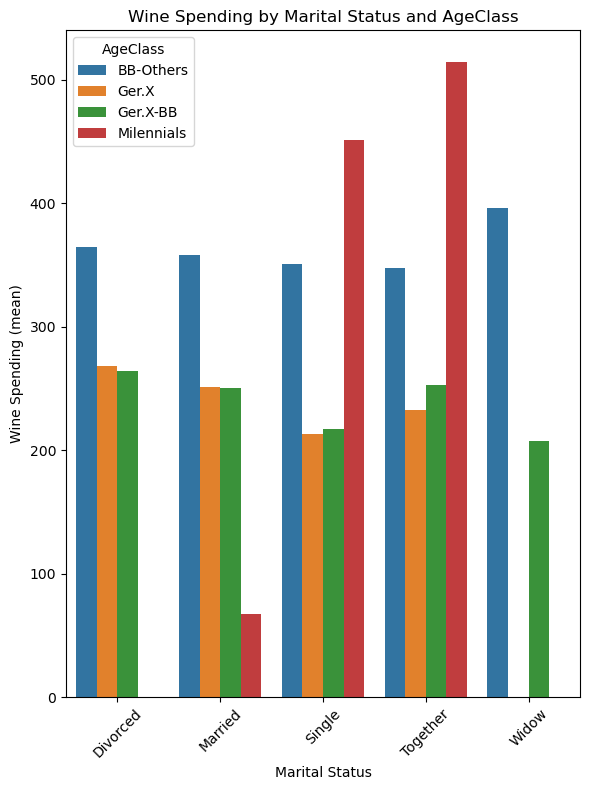

In [24]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_gasto_vinho, x='MaritalStatus', y='Wines',hue='AgeClass')
plt.title("Wine Spending by Marital Status and AgeClass")
plt.ylabel('Wine Spending (mean)')
plt.xlabel('Marital Status')
plt.legend(title='AgeClass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
media_gasto_vinho= dataset.groupby(['MaritalStatus', "Education"])['Wines'].mean().reset_index()

In [26]:
media_gasto_vinho

,MaritalStatus,Education,Wines
0,Divorced,2n Cycle,366.454545
1,Divorced,Basic,0.000000
2,Divorced,Graduation,300.579832
3,Divorced,Master,301.405405
4,Divorced,PhD,391.653846
5,Married,2n Cycle,154.777778
6,Married,Basic,15.200000
7,Married,Graduation,272.568129
8,Married,Master,327.717391
9,Married,PhD,430.536458


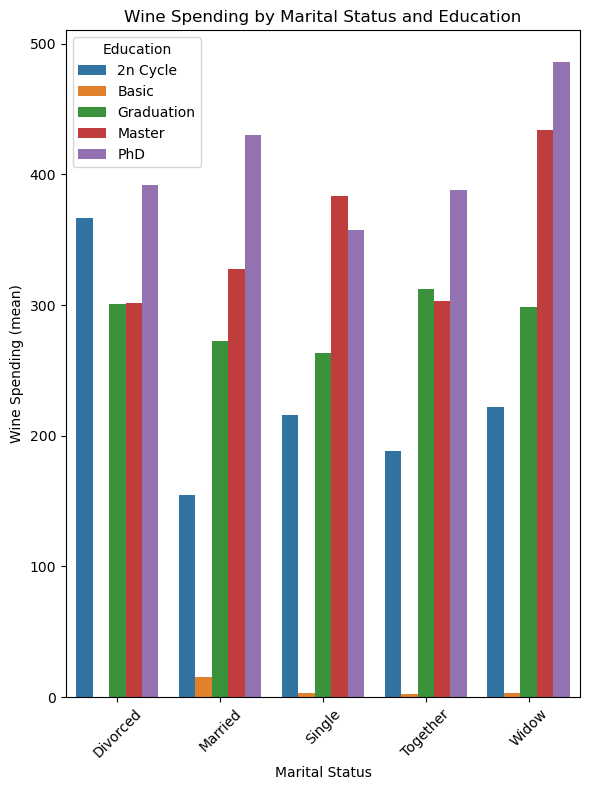

In [27]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_gasto_vinho, x='MaritalStatus', y='Wines',hue='Education')
plt.title("Wine Spending by Marital Status and Education")
plt.ylabel('Wine Spending (mean)')
plt.xlabel('Marital Status')
plt.legend(title='Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#5.Quem compra mais doces casas com ou sem filhos?

In [29]:
#Aparentemente os viúvos são sem ou com até dois filhos são os que mais comem doces. 
#Também podemos observar que as pessoas, independente do seu estado civil, sem filhos consomem mais doces do que as pessoas com três ou mais filhos. 

In [30]:
media_gasto_doces= dataset.groupby(['MaritalStatus', "Children"])['Sweet'].mean().reset_index()

In [31]:
media_gasto_doces

,MaritalStatus,Children,Sweet
0,Divorced,0,51.931034
1,Divorced,1,23.605042
2,Divorced,2,7.755102
3,Divorced,3,3.400000
4,Married,0,52.269565
5,Married,1,21.507795
6,Married,2,7.660714
7,Married,3,6.117647
8,Single,0,52.727811
9,Single,1,15.911504


In [32]:
media_gasto_doces['Children'] = media_gasto_doces['Children'].astype(str)

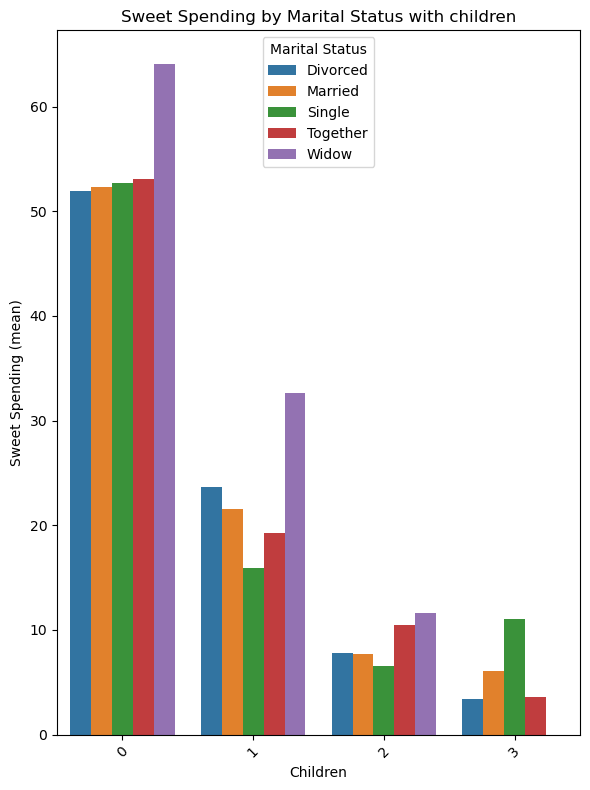

In [33]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_gasto_doces, x="Children", y="Sweet",hue='MaritalStatus')
plt.title("Sweet Spending by Marital Status with children")
plt.ylabel('Sweet Spending (mean)')
plt.xlabel('Children')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#6.Quem consome mais carne?

In [35]:
#Analisando de forma geral, todas as outras gerações e nível educacional parecem consumir carne, entretanto, a geração Millenials com nível educacional master são os que consomem mais a proteína carne e o nível educacional básico, que quase não consomem ou não consomem carne. 

In [36]:
media_gasto_proteina = dataset.groupby(["AgeClass", "Education"])["Meat"].mean().reset_index()

In [37]:
media_gasto_proteina

,AgeClass,Education,Meat
0,BB-Others,2n Cycle,199.422535
1,BB-Others,Basic,14.250000
2,BB-Others,Graduation,191.333333
3,BB-Others,Master,172.348837
4,BB-Others,PhD,151.100694
5,Ger.X,2n Cycle,95.555556
6,Ger.X,Basic,14.625000
7,Ger.X,Graduation,170.657459
8,Ger.X,Master,161.068182
9,Ger.X,PhD,263.732143


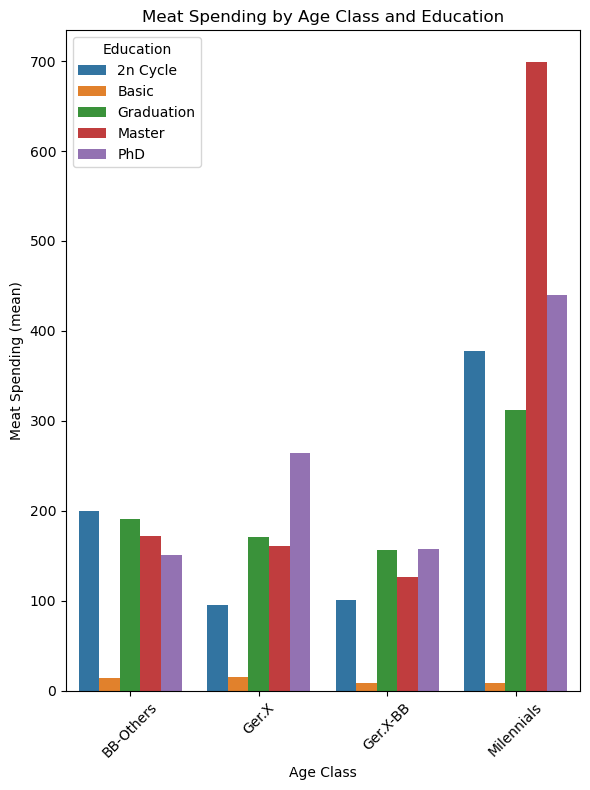

In [38]:
plt.figure(figsize=(6, 8))
sns.barplot(data=media_gasto_proteina, x="AgeClass", y="Meat",hue='Education')
plt.title("Meat Spending by Age Class and Education")
plt.ylabel('Meat Spending (mean)')
plt.xlabel('Age Class')
plt.legend(title='Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
#7.Quem vende mais, lojas físicas, catálogos e sites ?

In [40]:
#A maioria das vendas são realizadas pelas lojas físicas (12.962) seguidas da página web (9.143) e os catálogos (5.956). 

In [41]:
total_por_canal = dataset[["NumWeb","NumStore", "NumCatalog"]].sum().sort_values(ascending=False)

In [42]:
total_por_canal

NumStore      12962
NumWeb         9143
NumCatalog     5956
dtype: int64

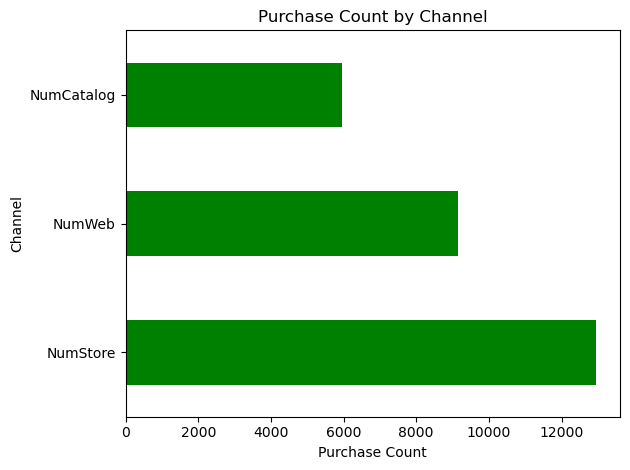

In [43]:
total_por_canal.plot(kind='barh', color='Green')
plt.title("Purchase Count by Channel")
plt.xlabel('Purchase Count')
plt.ylabel('Channel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
#8.Quem compra mais em lojas físicas ou nos sites ?

In [45]:
#A geração millenials que moram juntos e solteiros são os que mais compram nas lojas físicas, seguidos dos divorciados e da geração Xtemprana (Ger.X) e viúvos e casados das gerações Xtardia , Baby Boomers e outras gerações. 
#Já online, os viúvos e divorciados das gerações Baby Boomers e outras gerações passadas (BB-Others) são os que mais compram online. 

In [46]:
Num_gasto_store= dataset.groupby(['MaritalStatus', "AgeClass"])['NumStore'].mean().reset_index()

In [47]:
Num_gasto_store

,MaritalStatus,AgeClass,NumStore
0,Divorced,BB-Others,6.077465
1,Divorced,Ger.X,6.583333
2,Divorced,Ger.X-BB,5.272727
3,Married,BB-Others,6.395577
4,Married,Ger.X,5.229167
5,Married,Ger.X-BB,5.468852
6,Married,Milennials,3.875000
7,Single,BB-Others,6.183486
8,Single,Ger.X,4.962617
9,Single,Ger.X-BB,5.148148


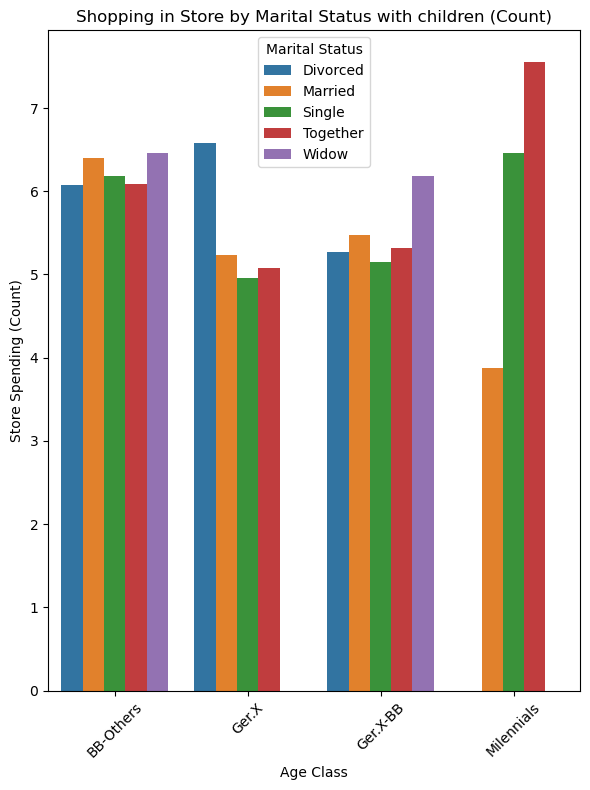

In [48]:
plt.figure(figsize=(6, 8))
sns.barplot(data=Num_gasto_store, x="AgeClass", y="NumStore",hue='MaritalStatus')
plt.title("Shopping in Store by Marital Status with children (Count)")
plt.ylabel('Store Spending (Count)')
plt.xlabel('Age Class')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
Num_gasto_web= dataset.groupby(['MaritalStatus', "AgeClass"])['NumWeb'].mean().reset_index()

In [50]:
Num_gasto_web

,MaritalStatus,AgeClass,NumWeb
0,Divorced,BB-Others,4.795775
1,Divorced,Ger.X,3.333333
2,Divorced,Ger.X-BB,3.597403
3,Married,BB-Others,4.560197
4,Married,Ger.X,3.319444
5,Married,Ger.X-BB,3.855738
6,Married,Milennials,2.750000
7,Single,BB-Others,4.325688
8,Single,Ger.X,3.345794
9,Single,Ger.X-BB,3.666667


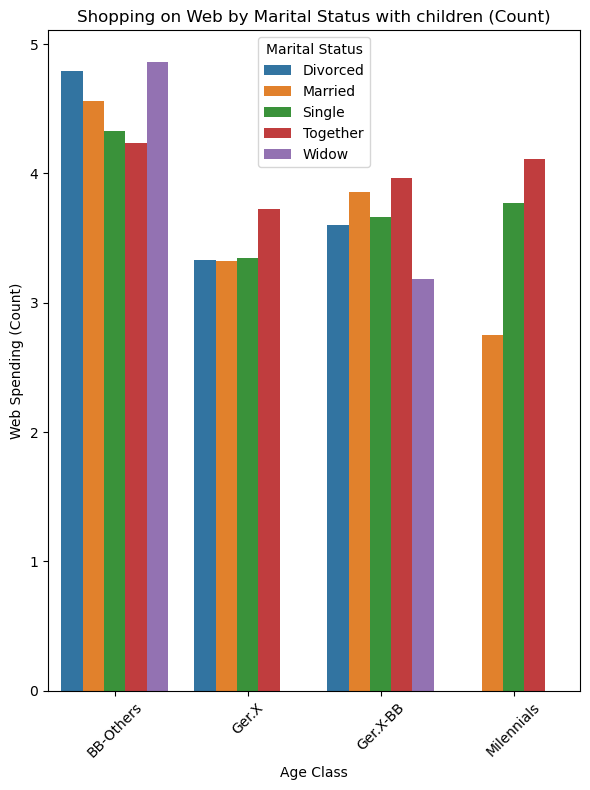

In [51]:
plt.figure(figsize=(6, 8))
sns.barplot(data=Num_gasto_web, x="AgeClass", y="NumWeb",hue='MaritalStatus')
plt.title("Shopping on Web by Marital Status with children (Count)")
plt.ylabel('Web Spending (Count)')
plt.xlabel('Age Class')
plt.legend(title='Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
#9.Qual a campanha com maior aceitação?

In [53]:
#A primeira campanha teve mais aceitação que a segunda, entretanto comparada ao número total de clientes, poucas pessoas aceitaram as ofertas em campanhas. 

In [54]:
total_por_cmp = dataset[["Cmp1","Cmp2"]].sum()

In [55]:
total_por_cmp

Cmp1    144
Cmp2     30
dtype: int64

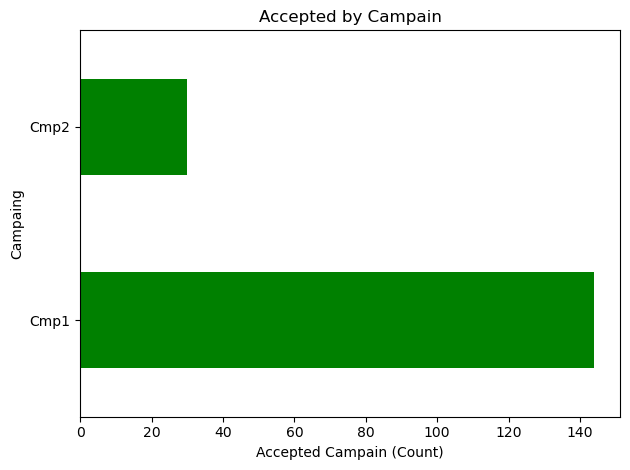

In [56]:
total_por_cmp.plot(kind='barh', color='Green')
plt.title("Accepted by Campain")
plt.xlabel('Accepted Campain (Count)')
plt.ylabel('Campaing')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
#Conclusão,baseado nas observações descritas anteriormente, podemos traçar os perfis:
#1º:Clientes solteiros, que moram juntos e divorciados das gerações millenials e geração Xtemprana) com alto grau de escolaridade, que ganham um salário alto, são os que consomem mais carnes e vinhos com preferência por realizar suas compras nas lojas. 
#2º:Gerações Baby Boomers e passadas de viúvos e divorciados, que também possuem alto nível de escolaridade e renda, gastam menos mas também gastam com vinhos e doces. diferente do anterior, preferem comprar online. 